In [48]:
import pandas as pd
from tqdm.notebook import tqdm

In [49]:
nodes_df = pd.read_csv('graph_data/nodes.csv').drop('Unnamed: 0', axis=1)
nodes_df

,type,x,y
0,0,32.3500,62.0786
1,0,39.3692,54.4111
2,0,29.6142,58.5803
3,0,38.5081,55.7278
4,0,44.8897,48.6169
...,...,...,...
8015,1,41.7958,44.4500
8016,1,40.9050,45.5706
8017,1,40.0564,54.5208
8018,1,50.6417,56.2978


In [50]:
nodes_tuple = tuple(zip(nodes_df['type'], nodes_df['x'], nodes_df['y']))
nodes_tuple

((0, 32.35, 62.0786),
 (0, 39.3692, 54.4111),
 (0, 29.6142, 58.5803),
 (0, 38.5081, 55.7278),
 (0, 44.8897, 48.6169),
 (0, 47.6133, 41.7853),
 (0, 93.1636, 53.9039),
 (0, 48.3483, 41.6175),
 (0, 38.4014, 44.4706),
 (0, 39.3508, 50.9861),
 (0, 41.1706, 46.3281),
 (0, 78.2372, 59.2211),
 (0, 61.6289, 57.7631),
 (0, 45.7797, 43.5286),
 (0, 41.7614, 47.0106),
 (0, 41.9167, 44.5906),
 (0, 40.4281, 48.2569),
 (0, 80.5178, 54.3558),
 (0, 81.7917, 54.0131),
 (0, 43.34, 43.7297),
 (0, 128.6117, 50.8883),
 (0, 40.5289, 48.2911),
 (0, 39.4353, 47.1578),
 (0, 43.4122, 50.1906),
 (0, 130.7258, 63.0228),
 (0, 63.9094, 55.3417),
 (0, 132.1672, 44.0267),
 (0, 41.3625, 46.4142),
 (0, 41.2692, 44.8975),
 (0, 41.1806, 43.9178),
 (0, 44.1183, 50.3608),
 (0, 44.6119, 56.3128),
 (0, 45.6322, 43.5717),
 (0, 61.9464, 56.9856),
 (0, 48.1181, 41.7),
 (0, 56.4167, 51.2467),
 (0, 46.6661, 51.9869),
 (0, 39.2747, 45.5083),
 (0, 38.6672, 46.6297),
 (0, 45.7206, 51.4944),
 (0, 61.0581, 56.8658),
 (0, 56.7139, 57.485

In [51]:
edges_list = []
for node1_index, node1 in tqdm(enumerate(nodes_tuple)):
    for node2_index in range(node1_index + 1, len(nodes_tuple)):
        node2 = nodes_tuple[node2_index]
        dist = ((node1[1] - node2[1]) ** 2 + (node1[2] - node2[2]) ** 2) ** 0.5

        types = (node1[0], node2[0])
        if min(types) == 0:
            if dist < 0.5:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 1:
            if dist < 2:
                edges_list.append((node1_index, node2_index, types, dist))
        if min(types) == 2:
            if dist < 5:
                edges_list.append((node1_index, node2_index, types, dist))
len(edges_list)

0it [00:00, ?it/s]

86687

In [52]:
edges_df = pd.DataFrame(edges_list)
edges_df.head()

,0,1,2,3
0,0,5286,"(0, 0)",0.453370
1,1,920,"(0, 0)",0.438010
2,1,1764,"(0, 0)",0.465643
3,1,3479,"(0, 0)",0.467988
4,1,3730,"(0, 0)",0.477435


In [53]:
edges_df = edges_df.rename({0: 'node1', 1: 'node2', 2: 'node_types', 3: 'weight'}, axis=1)
edges_df

,node1,node2,node_types,weight
0,0,5286,"(0, 0)",0.453370
1,1,920,"(0, 0)",0.438010
2,1,1764,"(0, 0)",0.465643
3,1,3479,"(0, 0)",0.467988
4,1,3730,"(0, 0)",0.477435
...,...,...,...,...
86682,7998,8000,"(1, 1)",1.015816
86683,8003,8010,"(1, 1)",0.682820
86684,8008,8016,"(1, 1)",1.124138
86685,8009,8017,"(1, 1)",1.018121


In [54]:
edges_df['min_type'] = edges_df['node_types'].map(lambda x: min(x))
edges_df

,node1,node2,node_types,weight,min_type
0,0,5286,"(0, 0)",0.453370,0
1,1,920,"(0, 0)",0.438010,0
2,1,1764,"(0, 0)",0.465643,0
3,1,3479,"(0, 0)",0.467988,0
4,1,3730,"(0, 0)",0.477435,0
...,...,...,...,...,...
86682,7998,8000,"(1, 1)",1.015816,1
86683,8003,8010,"(1, 1)",0.682820,1
86684,8008,8016,"(1, 1)",1.124138,1
86685,8009,8017,"(1, 1)",1.018121,1


<AxesSubplot: >

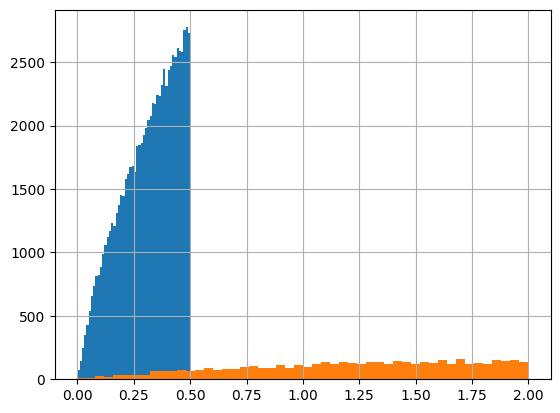

In [55]:
edges_df.loc[edges_df['min_type'] == 0]['weight'].hist(bins=50)
edges_df.loc[edges_df['min_type'] == 1]['weight'].hist(bins=50)
edges_df.loc[edges_df['min_type'] == 2]['weight'].hist(bins=50)

In [62]:
edges_df.to_csv('edges.csv',index=False)

In [57]:
import networkx as nx

G=nx.Graph()
for index, row in tqdm(edges_df.iterrows()):
    G.add_edge(row['node1'], row['node2'], weight=row['weight'])
G

0it [00:00, ?it/s]

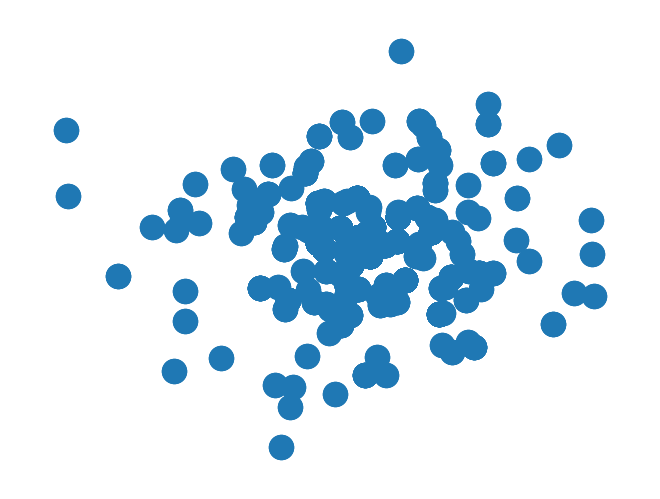

In [59]:
nx.draw(G,pos=nx.spectral_layout(G))